In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense ,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df1 = pd.read_csv('test.csv')

In [4]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
df1

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


# anlysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
for col in df.columns:
    print(col + '\n------')
    print(df[col].value_counts())
    print('---------------------')

battery_power
------
1589    6
618     6
1872    6
1379    5
1310    5
       ..
1072    1
1073    1
1074    1
1075    1
1998    1
Name: battery_power, Length: 1094, dtype: int64
---------------------
blue
------
0    1010
1     990
Name: blue, dtype: int64
---------------------
clock_speed
------
0.5    413
2.8     85
2.3     78
1.6     76
2.1     76
2.5     74
0.6     74
1.4     70
1.3     68
2.0     67
1.5     67
1.9     65
0.7     64
1.8     62
2.9     62
1.0     61
1.7     60
2.2     59
0.8     58
2.4     58
0.9     58
1.2     56
2.7     55
2.6     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64
---------------------
dual_sim
------
1    1019
0     981
Name: dual_sim, dtype: int64
---------------------
fc
------
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64
---------------------
four_g
------
1    

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# Data Visulaization

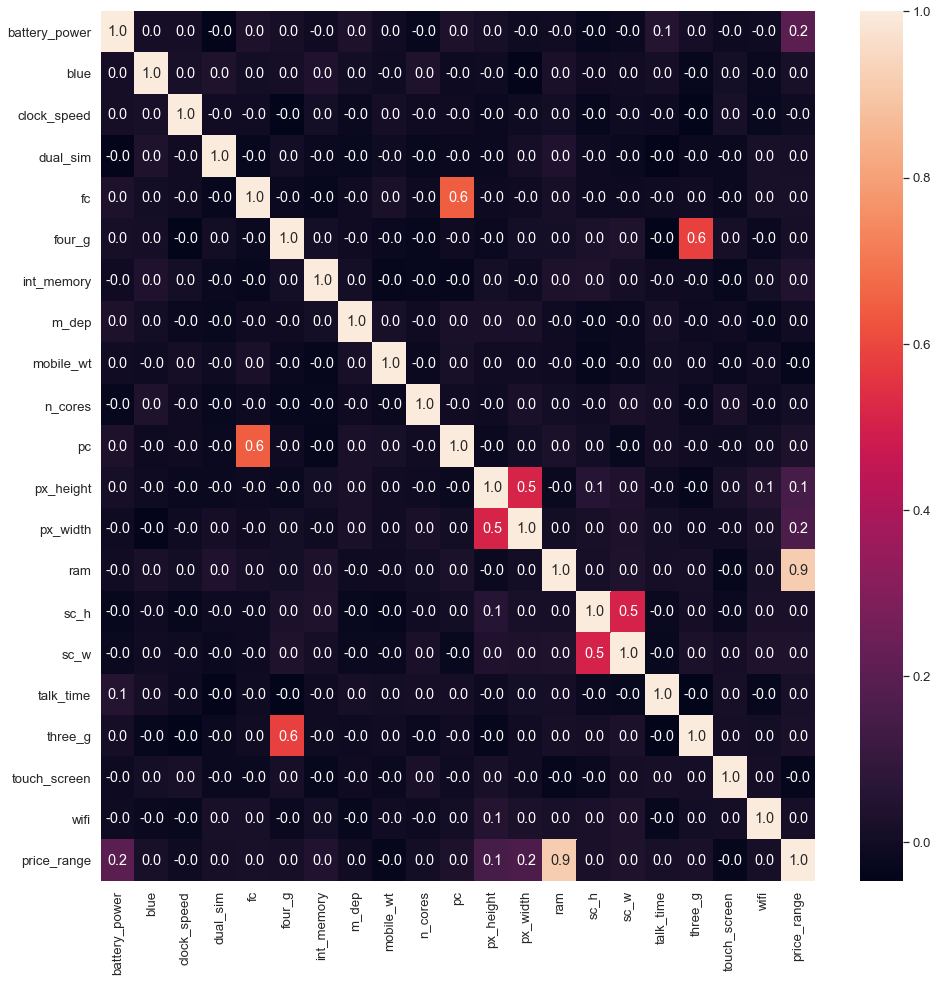

In [10]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt=".1f");


The relationship between price_renge and ram  is strong    
pc_width and pc_height is also correlated with price_range  
battery_power is also correlated with price_range  


# Data Cleaning

# outlire

In [11]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

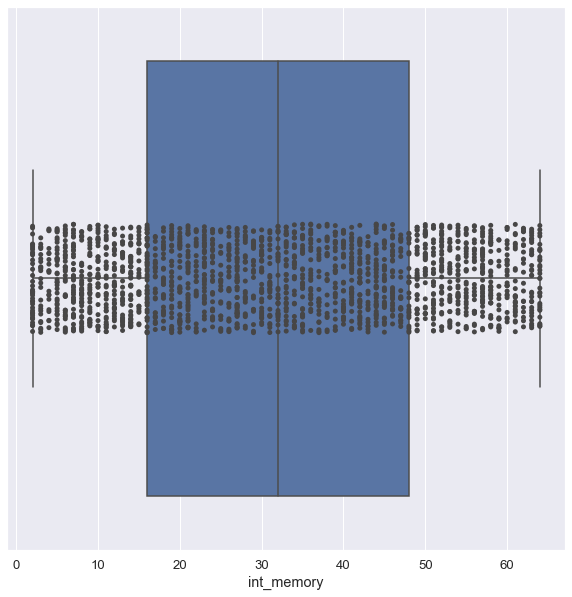

In [12]:
sns.boxplot(x='int_memory', data=df)
sns.stripplot(x='int_memory', data=df, color="#474646")

There is no out lire

# Model Preparation
^Normalization with StandardScaler   
^Split training and testing

In [13]:
dff=df.copy()

In [14]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [15]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()

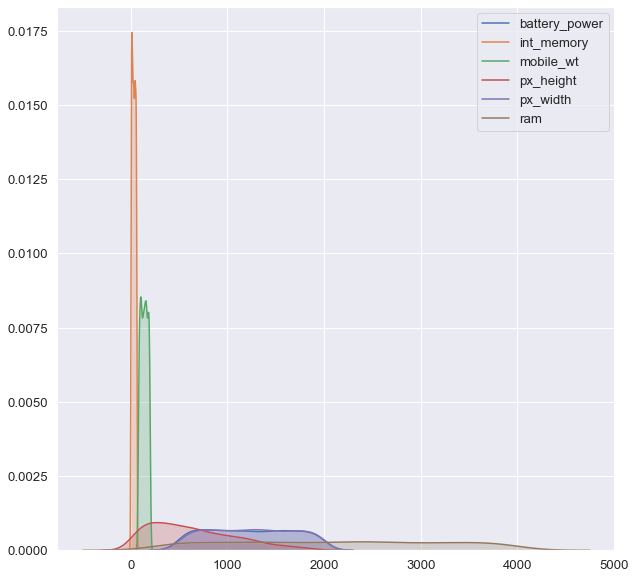

In [16]:
sns.kdeplot(df['battery_power'], shade=True)
sns.kdeplot(df['int_memory'], shade=True)
sns.kdeplot(df['mobile_wt'], shade=True)
sns.kdeplot(df['px_height'], shade=True)
sns.kdeplot(df['px_width'], shade=True)
sns.kdeplot(df['ram'], shade=True)

In [17]:
for column in ['battery_power','int_memory','mobile_wt','px_height','px_width','ram']:
    df[column] = stand.fit_transform(df[column].values.reshape(-1,1))

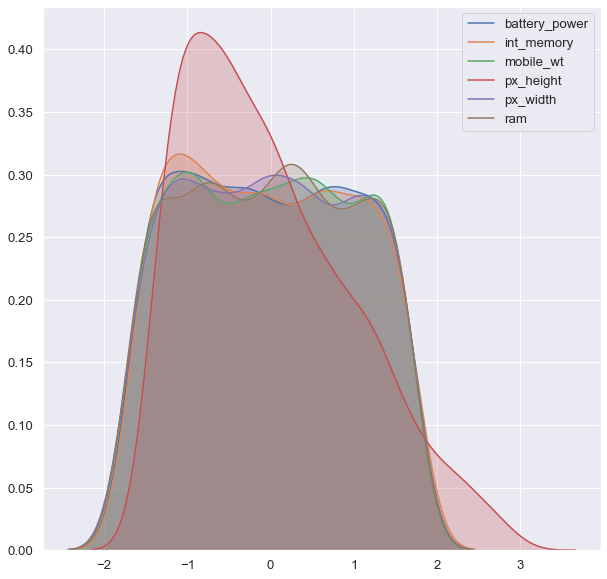

In [18]:
sns.kdeplot(df['battery_power'], shade=True)
sns.kdeplot(df['int_memory'], shade=True)
sns.kdeplot(df['mobile_wt'], shade=True)
sns.kdeplot(df['px_height'], shade=True)
sns.kdeplot(df['px_width'], shade=True)
sns.kdeplot(df['ram'], shade=True)

In [19]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2.000000e+03,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2.000000e+03,2000.000000,...,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.128298e-16,0.4950,1.522250,0.509500,4.309500,0.521500,-8.754109e-17,0.501750,1.804112e-16,4.520500,...,1.287304e-16,5.595524e-17,-1.582068e-16,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,1.000250e+00,0.5001,0.816004,0.500035,4.341444,0.499662,1.000250e+00,0.288416,1.000250e+00,2.287837,...,1.000250e+00,1.000250e+00,1.000250e+00,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,-1.678817e+00,0.0000,0.500000,0.000000,0.000000,0.000000,-1.656260e+00,0.100000,-1.702391e+00,1.000000,...,-1.454027e+00,-1.739251e+00,-1.722711e+00,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.804033e-01,0.0000,0.700000,0.000000,1.000000,0.000000,-8.845346e-01,0.200000,-8.829695e-01,3.000000,...,-8.167289e-01,-8.719579e-01,-8.453168e-01,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,-2.849593e-02,0.0000,1.500000,1.000000,3.000000,1.000000,-2.563229e-03,0.500000,2.122020e-02,4.000000,...,-1.828116e-01,-1.045034e-02,2.055123e-02,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,8.575560e-01,1.0000,2.200000,1.000000,7.000000,1.000000,8.794082e-01,0.800000,8.406421e-01,7.000000,...,6.810064e-01,8.828792e-01,8.670548e-01,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1.728812e+00,1.0000,3.000000,1.000000,19.000000,1.000000,1.761380e+00,1.000000,1.688320e+00,8.000000,...,2.963672e+00,1.727608e+00,1.727851e+00,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [20]:
x=df.drop('price_range', axis = 1)
y=df['price_range']
#xf=df.drop('price_range', axis = 1)
#yf=df['price_range']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=90)



# DL  by ANN

In [22]:
print(' X_train.shape : ',x_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' X_test.shape : ',x_test.shape)
print(' y_test.shape : ',y_test.shape)

 X_train.shape :  (1500, 20)
 y_train.shape :  (1500,)
 X_test.shape :  (500, 20)
 y_test.shape :  (500,)


In [23]:
model = Sequential()
model.add(Dense(12, input_dim=20, activation='relu'))

model.add(Dense(10, activation='relu'))

model.add(Dense(4, activation='softmax'))

model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                252       
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 426
Trainable params: 426
Non-trainable params: 0
_________________________________________________________________


In [24]:
print(' X_train.shape : ',x_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' X_test.shape : ',x_test.shape)
print(' y_test.shape : ',y_test.shape)

 X_train.shape :  (1500, 20)
 y_train.shape :  (1500,)
 X_test.shape :  (500, 20)
 y_test.shape :  (500,)


In [25]:
history=model.fit(x_train, y_train, batch_size = 10, epochs = 100,validation_split=0.15,validation_data=(x_train,y_train))

Epoch 1/100
128/128 [==============================] - 1s 2ms/step - loss: 1.7017 - accuracy: 0.2871 - val_loss: 1.3653 - val_accuracy: 0.3244
Epoch 2/100
128/128 [==============================] - 0s 1ms/step - loss: 1.3322 - accuracy: 0.3459 - val_loss: 1.3032 - val_accuracy: 0.3644
Epoch 3/100
128/128 [==============================] - 0s 1ms/step - loss: 1.2509 - accuracy: 0.4055 - val_loss: 1.2243 - val_accuracy: 0.3956
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - loss: 1.1428 - accuracy: 0.4675 - val_loss: 1.0992 - val_accuracy: 0.4711
Epoch 5/100
128/128 [==============================] - 0s 1ms/step - loss: 0.9891 - accuracy: 0.5616 - val_loss: 0.9054 - val_accuracy: 0.6800
Epoch 6/100
128/128 [==============================] - 0s 1ms/step - loss: 0.8258 - accuracy: 0.6871 - val_loss: 0.7515 - val_accuracy: 0.7600
Epoch 7/100
128/128 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.7710 - val_loss: 0.6204 - val_accuracy: 0.8400

Epoch 58/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1212 - accuracy: 0.9498 - val_loss: 0.1219 - val_accuracy: 0.9422
Epoch 59/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1215 - accuracy: 0.9490 - val_loss: 0.1090 - val_accuracy: 0.9511
Epoch 60/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.9514 - val_loss: 0.1136 - val_accuracy: 0.9556
Epoch 61/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1170 - accuracy: 0.9576 - val_loss: 0.1071 - val_accuracy: 0.9556
Epoch 62/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.9498 - val_loss: 0.0981 - val_accuracy: 0.9556
Epoch 63/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.9537 - val_loss: 0.1039 - val_accuracy: 0.9556
Epoch 64/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.9545 - val_loss: 0.1125 - val_accuracy:

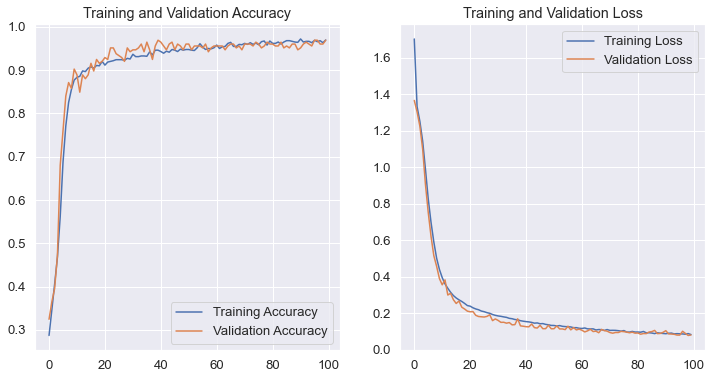

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
Y_pred = model.predict(x_test)
Y_pred

array([[1.4275276e-02, 9.8572469e-01, 2.9519170e-10, 3.7854499e-30],
       [1.8043927e-07, 9.3371159e-01, 6.6288255e-02, 7.4269069e-13],
       [3.0290897e-27, 1.0889669e-11, 1.0281601e-01, 8.9718395e-01],
       ...,
       [4.1483587e-01, 5.8516413e-01, 5.7144241e-11, 2.7989861e-31],
       [8.7364456e-36, 3.6370543e-17, 6.5599314e-05, 9.9993443e-01],
       [9.9997568e-01, 2.4266546e-05, 8.0526235e-21, 0.0000000e+00]],
      dtype=float32)

In [43]:

target_names = [0, 1 , 2, 3 ]
Y_pred = model.predict(x_test)
Y_pred =np.argmax(Y_pred, axis=1)

In [44]:
Y_pred

array([1, 1, 3, 2, 3, 1, 1, 1, 2, 0, 0, 3, 3, 1, 2, 2, 1, 0, 1, 2, 0, 2,
       2, 2, 3, 1, 1, 1, 0, 2, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 3, 3, 2, 3,
       1, 2, 2, 0, 1, 1, 3, 3, 0, 3, 0, 2, 0, 1, 0, 3, 1, 0, 2, 3, 2, 3,
       2, 0, 3, 0, 0, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 2, 3, 1, 1, 2,
       3, 0, 0, 3, 0, 2, 1, 3, 0, 0, 2, 2, 3, 0, 1, 2, 1, 0, 3, 2, 3, 2,
       1, 2, 3, 3, 3, 0, 3, 2, 0, 0, 2, 0, 1, 3, 3, 2, 2, 3, 0, 1, 0, 3,
       1, 3, 2, 0, 3, 3, 2, 0, 2, 2, 3, 1, 0, 2, 0, 0, 1, 3, 0, 3, 0, 1,
       2, 3, 1, 3, 3, 2, 3, 2, 0, 3, 0, 3, 3, 1, 0, 0, 2, 0, 1, 3, 2, 2,
       2, 0, 2, 3, 1, 2, 0, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 0, 1, 2, 2, 0,
       0, 2, 3, 0, 3, 3, 3, 0, 3, 3, 3, 2, 1, 0, 0, 0, 1, 3, 0, 0, 0, 2,
       2, 3, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 3, 1, 2, 3, 1, 1, 3, 3, 1, 3,
       0, 2, 3, 0, 2, 0, 3, 3, 3, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 1, 3, 2,
       1, 1, 1, 1, 1, 1, 3, 0, 3, 2, 2, 0, 1, 1, 1, 2, 2, 0, 3, 0, 2, 1,
       2, 3, 3, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 3, 3,

In [48]:
y_testt=list(y_test)
y_testt

[0,
 1,
 3,
 2,
 3,
 1,
 1,
 1,
 2,
 0,
 0,
 3,
 3,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 3,
 1,
 1,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 3,
 1,
 3,
 1,
 2,
 3,
 3,
 2,
 3,
 0,
 2,
 2,
 0,
 0,
 1,
 3,
 3,
 0,
 3,
 0,
 2,
 0,
 1,
 0,
 3,
 1,
 0,
 2,
 3,
 2,
 3,
 2,
 0,
 3,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 1,
 2,
 3,
 0,
 0,
 3,
 0,
 2,
 1,
 3,
 0,
 1,
 2,
 2,
 3,
 0,
 2,
 2,
 1,
 0,
 3,
 2,
 3,
 2,
 1,
 2,
 3,
 3,
 3,
 0,
 3,
 2,
 0,
 0,
 1,
 0,
 1,
 3,
 3,
 2,
 2,
 3,
 0,
 1,
 0,
 3,
 1,
 3,
 2,
 0,
 3,
 3,
 2,
 0,
 2,
 2,
 3,
 1,
 0,
 2,
 0,
 0,
 1,
 3,
 0,
 3,
 0,
 1,
 2,
 3,
 1,
 3,
 2,
 1,
 2,
 2,
 0,
 3,
 0,
 3,
 3,
 1,
 0,
 0,
 2,
 0,
 1,
 3,
 2,
 3,
 3,
 0,
 2,
 2,
 1,
 2,
 0,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 2,
 3,
 0,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 2,
 1,
 0,
 0,
 0,
 1,
 3,
 0,
 1,
 0,
 2,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 0,
 2,
 3,
 0,
 2,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 0,
 2,
 3,
 1,
 2,
 0,
 3,
 3,


In [49]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(y_testt, Y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       128
           1       0.91      0.92      0.92       115
           2       0.93      0.93      0.93       122
           3       0.94      0.98      0.96       135

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_testt, Y_pred)
cm

array([[119,   9,   0,   0],
       [  4, 106,   5,   0],
       [  0,   1, 113,   8],
       [  0,   0,   3, 132]], dtype=int64)

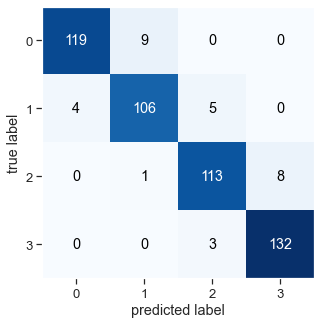

In [53]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

# ML Grid Search with svm

In [30]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression(random_state=42)
from sklearn.svm import SVC
svm = SVC(random_state=42)
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score

In [31]:
sv= SVC(C=10,kernel='linear',random_state=42)
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
accuracy_score(y_test, y_pred)

0.968

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       128
           1       0.96      0.96      0.96       115
           2       0.95      0.95      0.95       122
           3       0.97      0.98      0.97       135

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [33]:
confusion_matrix(y_test, y_pred)

array([[126,   2,   0,   0],
       [  2, 110,   3,   0],
       [  0,   2, 116,   4],
       [  0,   0,   3, 132]], dtype=int64)

# Price prediction of Test.csv Using  ANN  and  Grid Search with svm 

In [34]:
df1.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [35]:
df1=df1.drop('id', axis = 1)

In [36]:
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [37]:
for column in ['battery_power','int_memory','mobile_wt','px_height','px_width','ram']:
    df1[column] = stand.fit_transform(df1[column].values.reshape(-1,1))

In [38]:

target_names = [0, 1 , 2, 3 ]
Y_pred = model.predict(df1)
y_pred =np.argmax(Y_pred, axis=1)
y_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 0, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 3, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 2, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 2, 1, 1, 3, 2, 3, 2, 2, 1, 1, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [39]:
sv= SVC(C=10,kernel='linear',random_state=42)
sv.fit(x_train,y_train)
y_predd=sv.predict(df1)
y_predd

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 2, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [40]:
df1['price_range']=y_pred

In [41]:
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.475451,1,1.8,1,14,0,-1.581269,0.1,1.535535,3,...,-0.926990,0.391912,1.229373,12,7,2,0,1,0,3
1,-0.942782,1,0.5,1,4,1,1.509303,0.8,1.478120,5,...,0.274729,-0.871028,1.614643,6,0,7,1,0,0,3
2,1.292077,1,2.8,0,1,0,-0.367116,0.9,1.334582,3,...,1.485693,0.287236,0.236313,17,10,10,0,1,1,2
3,0.688249,0,0.5,1,18,1,-0.477493,0.5,-1.249091,8,...,-0.767532,1.165604,1.612804,10,0,7,1,1,0,3
4,0.429135,0,1.4,0,11,1,0.847037,0.5,-0.904602,6,...,0.281662,-0.977979,-0.336535,15,8,7,1,0,1,1
